<a href="https://colab.research.google.com/github/srihiyacine/Real-Estate-Listings-Brazil-EDA./blob/main/Project_1_Real_Estate_Listings_Brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://data.world/

https://data.world/properati/real-estate-listings-brazil

https://query.data.world/s/3jqohxx2pmmyqr7cuyjpal7e2rato4?dws=00000

In [ ]:
from rich import print

import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
def wrangle(file_path):

  df = pd.read_csv(file_path)

  # subset the state names as new colmun
  df["state"] = df["place_with_parent_names"].str.split("|").str[2]

  # Selecting São Paulo
  mask_sao_paulo = df["state"] == "São Paulo"
  df = df[mask_sao_paulo]

  # Selecting property type apartment
  mask_apartment = df["property_type"] == "apartment"
  df = df[mask_apartment]

  # Selecting Apartment less than 5000
  mask_price = df["price_aprox_usd"] < 5_000
  df = df[mask_price]

  # Subset data: remove outliers
  low, high = df["surface_covered_in_m2"].quantile([0.05, 0.95])
  mask_area = df["surface_covered_in_m2"].between(low, high)
  df = df[mask_area]

  # Columns to be removed
  columns_to_remove = [
    "state",
    "image_thumbnail",
    "title",
    "description",
    "properati_url",
    "expenses",
    "floor",
    "place_with_parent_names",
    "lat-lon",
    "operation",
    "geonames_id",
    "currency",
    "property_type",
    "created_on",
    "price_aprox_local_currency",
    "price_per_m2",
    "price_usd_per_m2",
    "surface_total_in_m2",
    "price"]
  df.drop(columns=columns_to_remove, inplace=True)

  # Drop Nan values
  df.dropna(axis=0, inplace=True)

  # Convert rooms column values from float to int
  df_copy = df.copy()
  df['rooms'] = df_copy["rooms"].astype(int)

  return df



In [ ]:
df = wrangle('https://query.data.world/s/gybbrrbbstu7sqh2ynzz5us32ogr24?dws=00000')
df.head()

,place_name,lat,lon,price_aprox_usd,surface_covered_in_m2,rooms
154,Morumbi,-23.624269,-46.729195,725.96,119.0,3
158,Morumbi,-23.627405,-46.730850,694.40,65.0,1
159,Morumbi,-23.627405,-46.730850,694.40,65.0,1
160,Morumbi,-23.627405,-46.730850,694.40,65.0,1
161,Panamby,-23.625345,-46.719868,1578.18,128.0,4


In [ ]:
df["surface_covered_in_m2"].describe()

count    12308.000000
mean        85.366672
std         40.582220
min         34.000000
25%         55.000000
50%         70.000000
75%        104.000000
max        211.000000
Name: surface_covered_in_m2, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12308 entries, 154 to 97342
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   place_name             12308 non-null  object 
 1   lat                    12308 non-null  float64
 2   lon                    12308 non-null  float64
 3   price_aprox_usd        12308 non-null  float64
 4   surface_covered_in_m2  12308 non-null  float64
 5   rooms                  12308 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 673.1+ KB


In [ ]:
df["price_aprox_usd"].describe()


count    12308.000000
mean       888.463253
std        716.152118
min         93.610000
25%        410.320000
50%        655.300000
75%       1092.170000
max       4992.820000
Name: price_aprox_usd, dtype: float64

In [ ]:
df["price_aprox_usd"].mode()

0    624.1
Name: price_aprox_usd, dtype: float64

# Box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x7851c67220e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7851c6722620>,
 'boxes': [<matplotlib.lines.Line2D at 0x7851c6721e40>],
 'medians': [<matplotlib.lines.Line2D at 0x7851c6722b60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7851c6722e00>],
 'means': []}

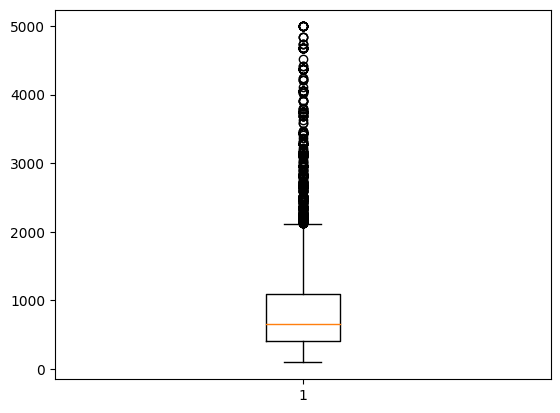

In [ ]:
df["price_aprox_usd"].describe()
plt.boxplot(df["price_aprox_usd"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7851c6c14bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7851c6c15060>,
 'boxes': [<matplotlib.lines.Line2D at 0x7851c6c148b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7851c6c155a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7851c6c15840>],
 'means': []}

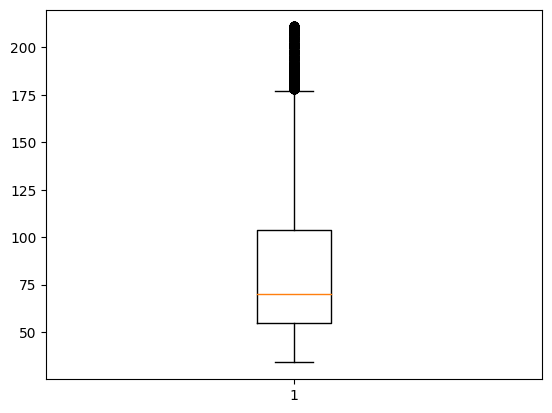

In [ ]:
plt.boxplot(df["surface_covered_in_m2"])

# Bar Plot

## Matplotlib

In [ ]:
df['rooms'].value_counts()

1     6808
2     2812
3     1137
4      321
5      263
6      262
8      180
7      176
9       85
10      80
12      62
11      59
14      24
13      21
15      11
16       2
17       2
18       1
20       1
22       1
Name: rooms, dtype: int64

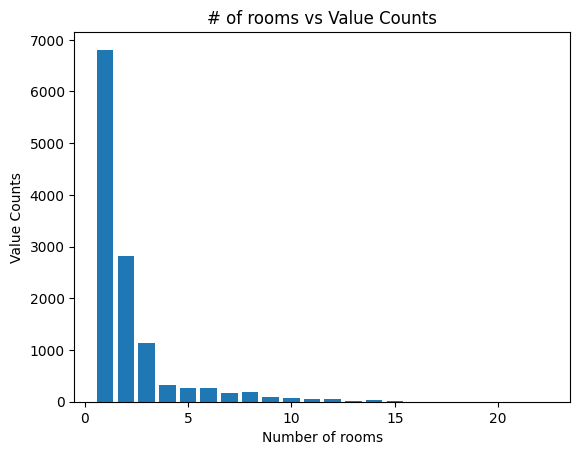

In [ ]:
plt.bar(x=df['rooms'].value_counts().index, height=df['rooms'].value_counts().values)
plt.xlabel('Number of rooms')
plt.ylabel('Value Counts')
plt.title('# of rooms vs Value Counts')
plt.show()

## Seaborn

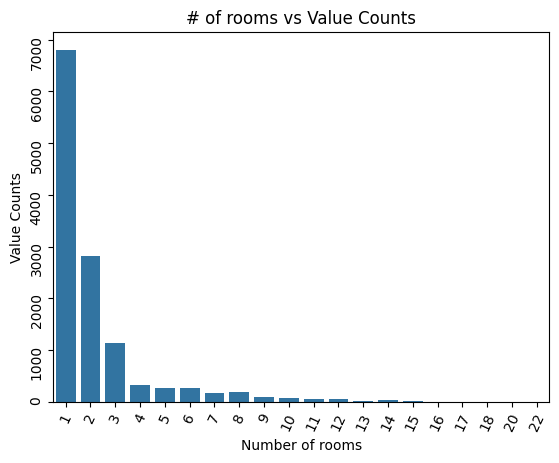

In [ ]:
sns.barplot(x=df['rooms'].value_counts().index, y=df['rooms'].value_counts().values)
plt.xlabel('Number of rooms')
plt.ylabel('Value Counts')
plt.xticks(rotation=65)
plt.yticks(rotation=90)
plt.title('# of rooms vs Value Counts')
plt.show()

## Matplotlib

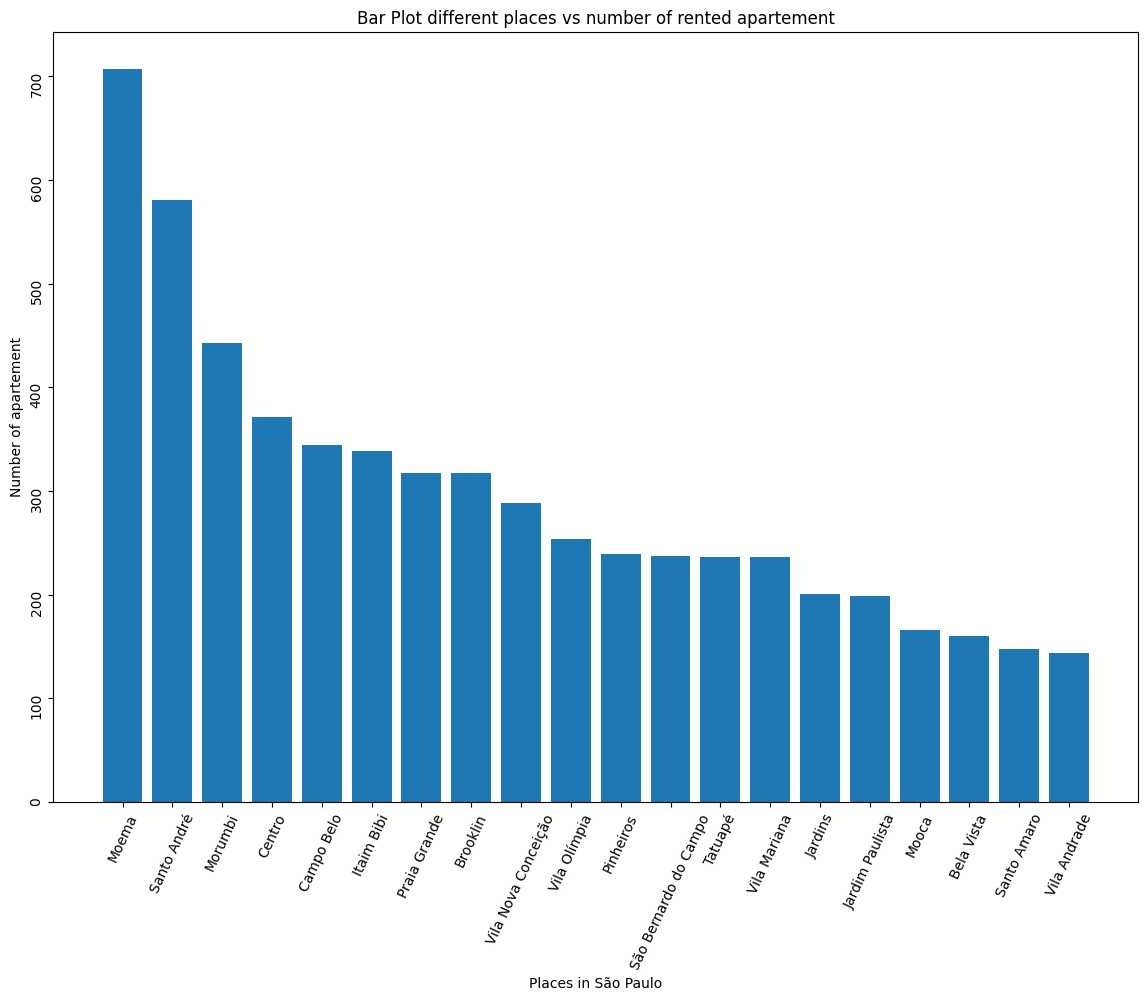

In [ ]:
# Set figure size
plt.figure(figsize=(14, 10))

plt.bar(x=df['place_name'].value_counts().index[:20], height=df['place_name'].value_counts().values[:20])
plt.xlabel('Places in São Paulo')
plt.ylabel('Number of apartement')
plt.xticks(rotation=65)
plt.yticks(rotation=90)

plt.title('Bar Plot different places vs number of rented apartement')
plt.show();

In [ ]:
df.shape

(12308, 6)

In [ ]:
df["place_name"].value_counts()

Moema                      707
Santo André                581
Morumbi                    443
Centro                     371
Campo Belo                 344
                          ... 
Jardim Santa Rosália         1
Ipanema Ville                1
Parque Rincão                1
Vila das Hortências          1
Empresarial 18 do Forte      1
Name: place_name, Length: 697, dtype: int64

In [ ]:
mean_price_by_place_name = df.groupby("place_name")["price_aprox_usd"].mean().sort_values(ascending = True)
mean_price_by_place_name.head()

place_name
Jardim Santa Rosália    158.710000
Jardim Parque Jupiá     167.164286
Bosque da Felicidade    171.620000
Mirassol                171.620000
Vila Altinópolis        171.620000
Name: price_aprox_usd, dtype: float64

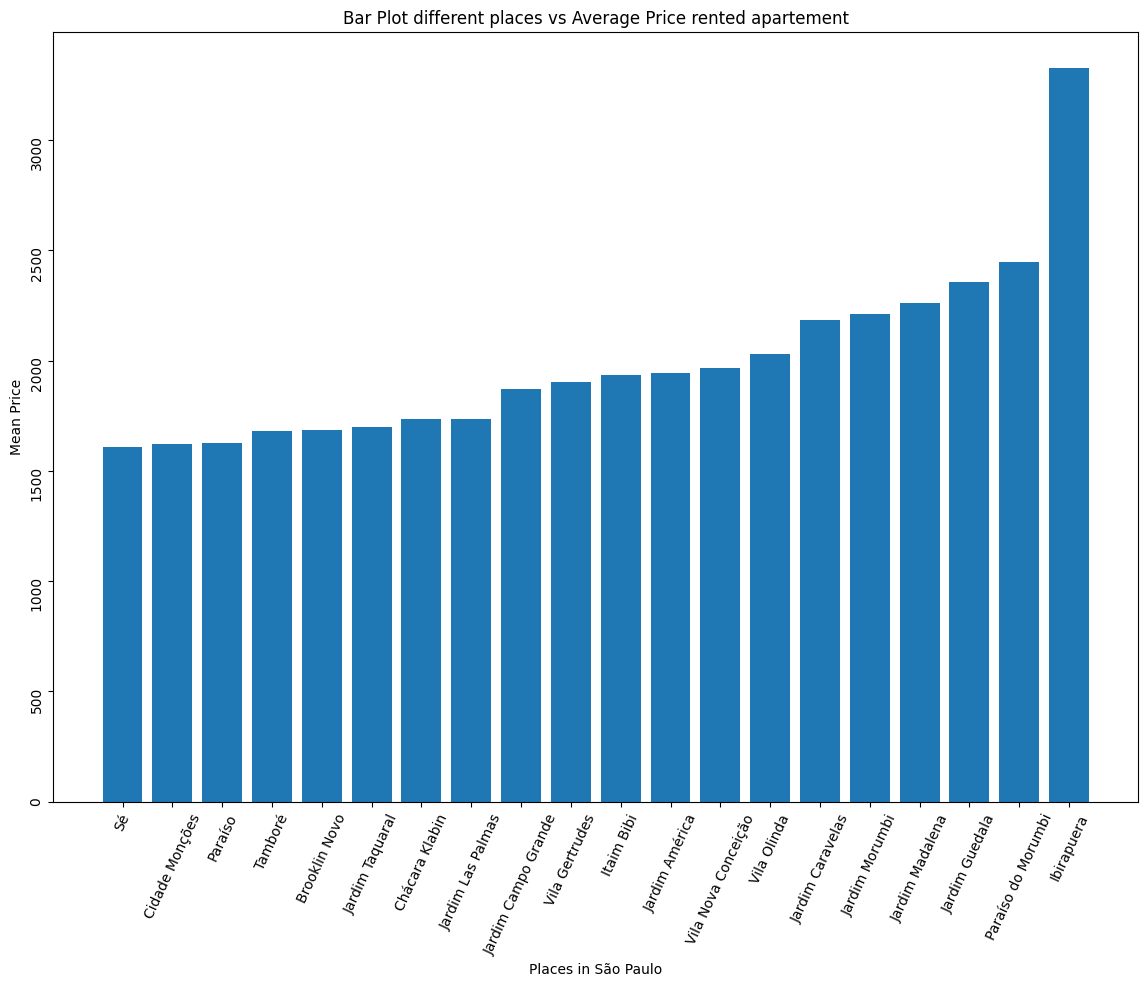

In [ ]:
plt.figure(figsize=(14, 10))

plt.bar(x=mean_price_by_place_name.index[-20:], height=mean_price_by_place_name.values[-20:])
plt.xlabel('Places in São Paulo')
plt.ylabel('Mean Price')
plt.xticks(rotation=65)
plt.yticks(rotation=90)

plt.title('Bar Plot different places vs Average Price rented apartement')
plt.show();

In [ ]:
sum_price_by_place_name = df.groupby("place_name")["price_aprox_usd"].sum().sort_values(ascending = True)
sum_price_by_place_name.head()

place_name
Jardim Santa Rosália    158.71
Jardim Vitória          171.62
Bosque da Felicidade    171.62
Mirassol                171.62
Vila Altinópolis        171.62
Name: price_aprox_usd, dtype: float64

In [ ]:
df.columns

Index(['place_name', 'lat', 'lon', 'price_aprox_usd', 'surface_covered_in_m2',
       'rooms'],
      dtype='object')

## Plotly Express

In [ ]:
fig =  px.scatter_mapbox(
    df,
    lat=df["lat"],
    lon=df["lon"],
    center={"lat": -23.56, "lon": -46.64 },
    width=1200,
    height=800,
    hover_data=["price_aprox_usd", "place_name"],
    color="price_aprox_usd",
    size="price_aprox_usd"
)
fig.update_layout(mapbox_style="open-street-map",
                  title="São Paulo Rented Apartment")
fig.show()

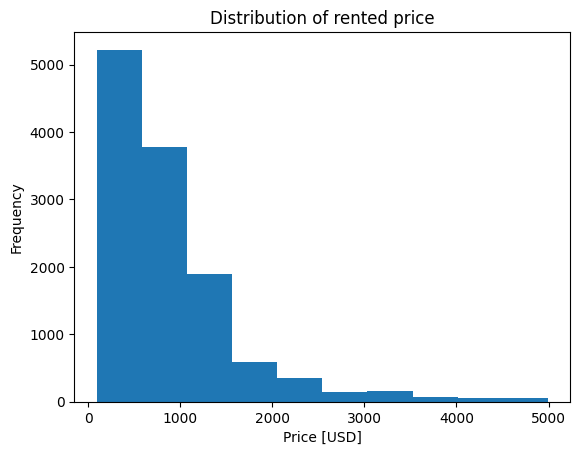

In [ ]:
plt.hist(df["price_aprox_usd"])
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
plt.title("Distribution of rented price")
plt.show();

In [ ]:
df.columns

Index(['place_name', 'lat', 'lon', 'price_aprox_usd', 'surface_covered_in_m2',
       'rooms'],
      dtype='object')

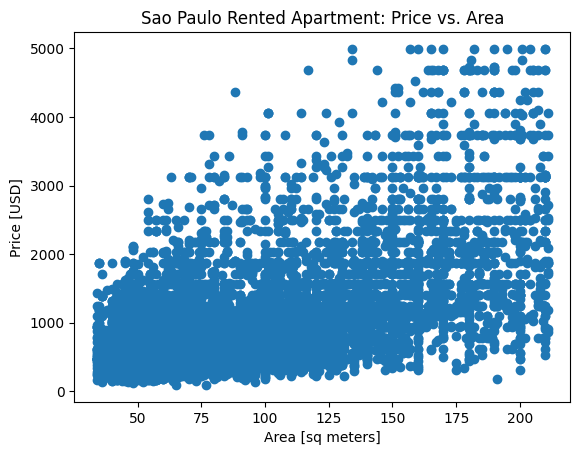

In [ ]:
x = df["surface_covered_in_m2"]
y = df["price_aprox_usd"]
plt.scatter(x, y)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Sao Paulo Rented Apartment: Price vs. Area")
plt.show();

In [ ]:
correlation_area_price = df["surface_covered_in_m2"].corr(df["price_aprox_usd"])
correlation_area_price

0.6256459426005896

In [ ]:
df["place_name"].value_counts().sort_values(ascending=False)[:10]

Moema                  707
Santo André            581
Morumbi                443
Centro                 371
Campo Belo             344
Itaim Bibi             339
Praia Grande           317
Brooklin               317
Vila Nova Conceição    288
Vila Olímpia           254
Name: place_name, dtype: int64

place_name
Praia Grande           0.778178
Vila Nova Conceição    0.737459
Morumbi                0.696465
Campo Belo             0.696258
Brooklin               0.694231
Moema                  0.693090
Santo André            0.683691
Vila Olímpia           0.672781
Itaim Bibi             0.477447
Centro                 0.403342
dtype: float64

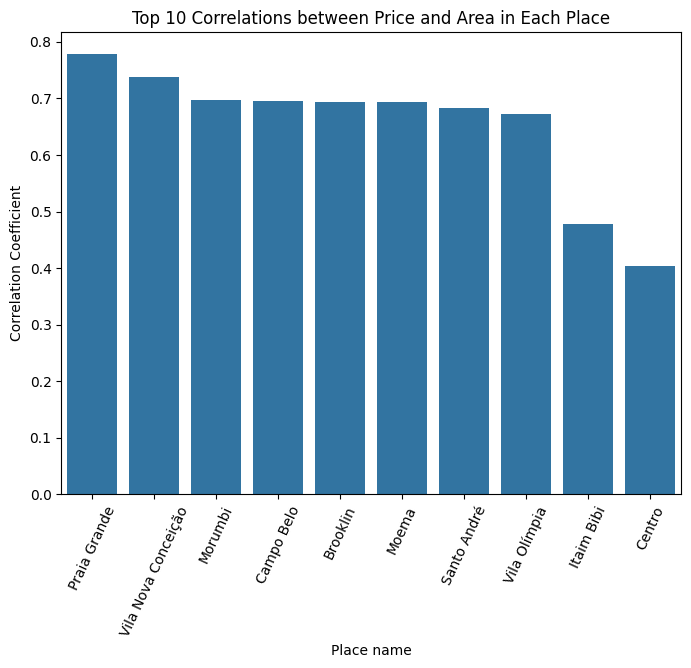

In [ ]:
first_10_places = df["place_name"].value_counts().sort_values(ascending=False)[:10]
mask_filter = df["place_name"].isin(first_10_places.index)
df_filtered = df[mask_filter]

# Group by 'place_name' column and calculate correlation within each group
correlations = df_filtered.groupby("place_name").apply(lambda x: x['price_aprox_usd'].corr(x['surface_covered_in_m2']))

# Sort correlations
sorted_correlations = correlations.sort_values(ascending=False)
print(sorted_correlations)

# Plotting the top 10 correlations
plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_correlations.head(10).index, y=sorted_correlations.head(10).values)
plt.title('Top 10 Correlations between Price and Area in Each Place')
plt.xlabel("Place name")
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=65)
# plt.ylim(-1, 1)  # Set y-axis limits
plt.show()


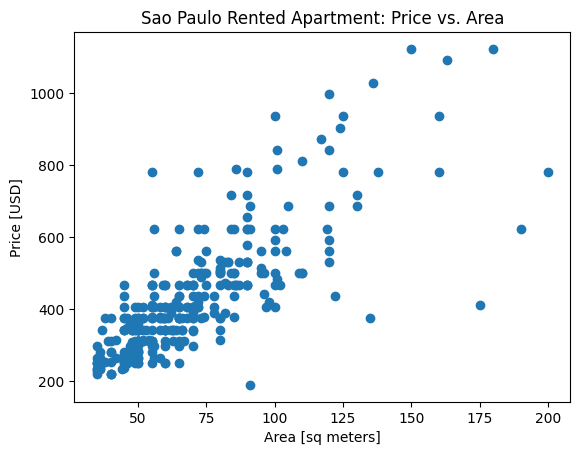

In [ ]:
df_Praia_Grande = df[df["place_name"] == "Praia Grande"]
x = df_Praia_Grande["surface_covered_in_m2"]
y = df_Praia_Grande ["price_aprox_usd"]
plt.scatter(x, y)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Sao Paulo Rented Apartment: Price vs. Area")
plt.show();